# Explore here

In [803]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [804]:
df.info

<bound method DataFrame.info of                            date        sales
0    2022-09-03 17:10:08.079328    55.292157
1    2022-09-04 17:10:08.079328    53.803211
2    2022-09-05 17:10:08.079328    58.141693
3    2022-09-06 17:10:08.079328    64.530899
4    2022-09-07 17:10:08.079328    66.013633
..                          ...          ...
361  2023-08-30 17:10:08.079328   989.600354
362  2023-08-31 17:10:08.079328   994.987326
363  2023-09-01 17:10:08.079328   995.814415
364  2023-09-02 17:10:08.079328   997.350214
365  2023-09-03 17:10:08.079328  1000.482785

[366 rows x 2 columns]>

In [805]:
df.dtypes

date      object
sales    float64
dtype: object

In [806]:
df.describe()

,sales
count,366.000000
mean,524.963968
std,275.089698
min,53.803211
25%,290.186822
50%,520.699468
75%,763.289263
max,1000.482785


In [807]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

df['date'] = pd.to_datetime(df['date'])
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [808]:
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [809]:
df.set_index('date', inplace=True)

In [810]:
# Agrupar los datos por mes
grouped = df.groupby(df.index.month)

# Iterar sobre los grupos y mostrar las entradas para cada mes
for month, group in grouped:
    print(f"Mes {month}:")
    print(group)
    print()

Mes 1:
                                 sales
date                                  
2023-01-01 17:10:08.079328  363.458044
2023-01-02 17:10:08.079328  361.633304
2023-01-03 17:10:08.079328  368.428961
2023-01-04 17:10:08.079328  374.116144
2023-01-05 17:10:08.079328  370.656022
2023-01-06 17:10:08.079328  374.893562
2023-01-07 17:10:08.079328  376.639745
2023-01-08 17:10:08.079328  386.095736
2023-01-09 17:10:08.079328  385.167569
2023-01-10 17:10:08.079328  386.975810
2023-01-11 17:10:08.079328  386.046416
2023-01-12 17:10:08.079328  392.576652
2023-01-13 17:10:08.079328  391.538646
2023-01-14 17:10:08.079328  396.259875
2023-01-15 17:10:08.079328  396.859585
2023-01-16 17:10:08.079328  403.399163
2023-01-17 17:10:08.079328  405.702375
2023-01-18 17:10:08.079328  405.950446
2023-01-19 17:10:08.079328  410.366102
2023-01-20 17:10:08.079328  408.501637
2023-01-21 17:10:08.079328  409.909789
2023-01-22 17:10:08.079328  418.304476
2023-01-23 17:10:08.079328  420.089062
2023-01-24 17:10:0

In [811]:
df.shape

(366, 1)

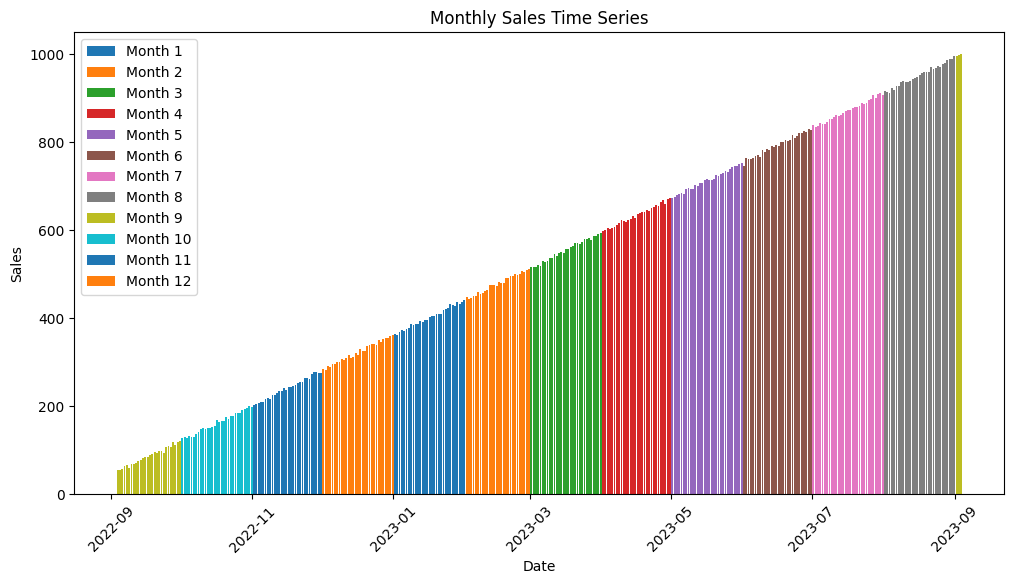

In [812]:
import matplotlib.dates as mdates

# Visualizar la serie temporal mensual
plt.figure(figsize=(12, 6))
for month, group in grouped:
    plt.bar(group.index, group['sales'], label=f'Month {month}')

plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [813]:
df.shape

(366, 1)

In [814]:
# Interpolar los valores faltantes en la serie temporal
monthly_sales_interpolated = df.interpolate(method='linear')
tensor = df.shape
tendencia = df['sales'].ewm(span=12, adjust=False).mean()
# Descomposición de la serie temporal interpolada
result = seasonal_decompose(df['sales'], model='additive', period=6)

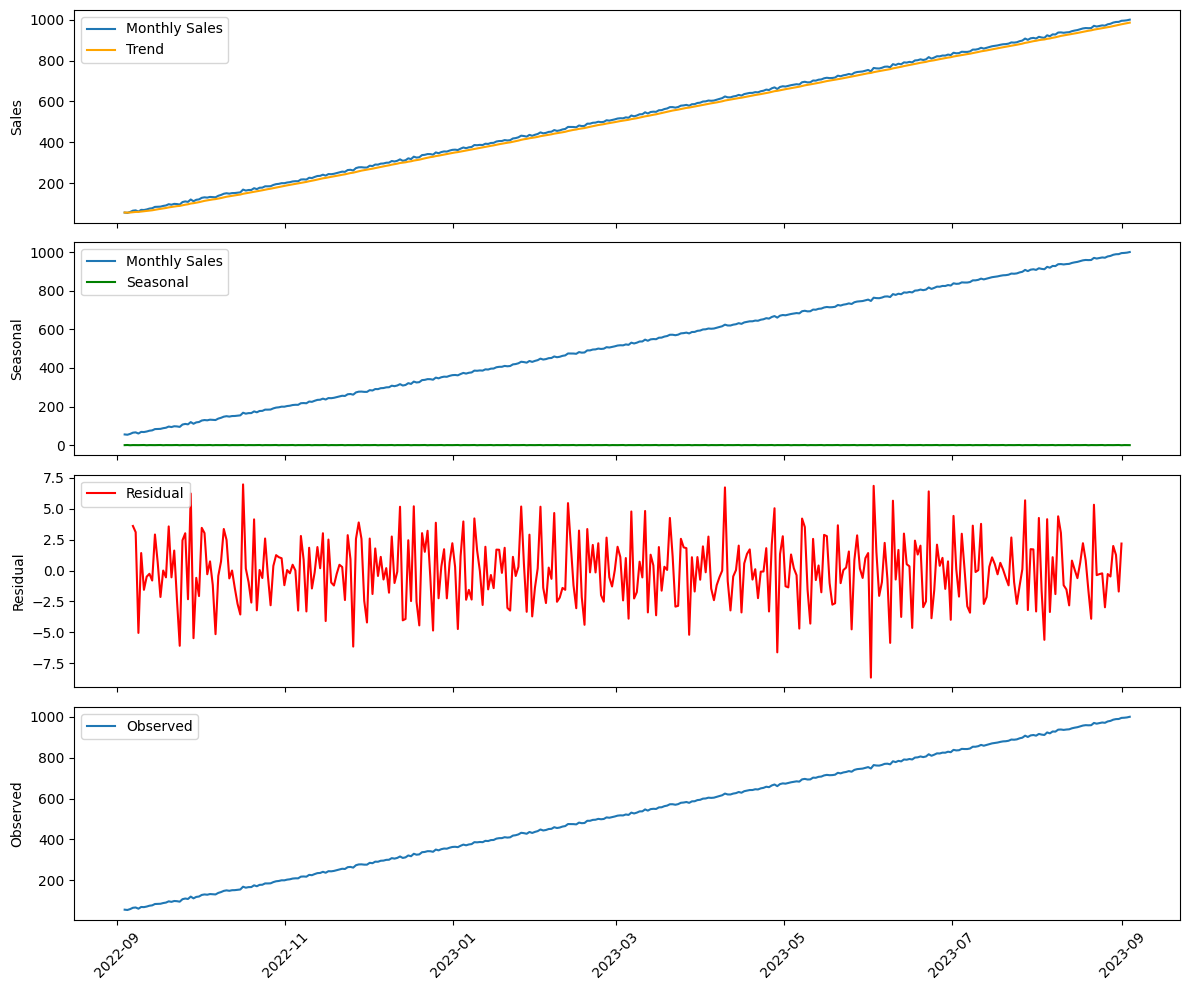

In [815]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Graficar cada componente junto con las ventas mensuales
axes[0].plot(monthly_sales_interpolated.index, monthly_sales_interpolated['sales'], label='Monthly Sales')
axes[0].plot(tendencia.index, tendencia, label='Trend', color='orange')
axes[0].set_ylabel('Sales')
axes[0].legend()

axes[1].plot(monthly_sales_interpolated.index, monthly_sales_interpolated['sales'], label='Monthly Sales')
axes[1].plot(result.seasonal.index, result.seasonal, label='Seasonal', color='green')
axes[1].set_ylabel('Seasonal')
axes[1].legend()

axes[2].plot(result.resid.index, result.resid, label='Residual', color='red')
axes[2].set_ylabel('Residual')
axes[2].legend()

axes[3].plot(result.observed.index, result.observed, label='Observed')
axes[3].set_ylabel('Observed')
axes[3].legend()

# Rotar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [816]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

def test_stationarity(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    print("Dickey-Fuller test results:")
    dftest = adfuller(trend.dropna(), autolag="AIC")  # Se eliminan los valores NaN
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(group)

Dickey-Fuller test results:


Test Statistic                  0.219997
p-value                         0.973361
#Lags Used                      7.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64

In [817]:
# Responder a las preguntas

print(f"Tensor de la serie temporal: {monthly_sales_interpolated.shape}")
print(f"Tendencia: {tendencia}")

Tensor de la serie temporal: (366, 1)
Tendencia: date
2022-09-03 17:10:08.079328     55.292157
2022-09-04 17:10:08.079328     55.063088
2022-09-05 17:10:08.079328     55.536720
2022-09-06 17:10:08.079328     56.920440
2022-09-07 17:10:08.079328     58.319393
                                 ...    
2023-08-30 17:10:08.079328    974.812884
2023-08-31 17:10:08.079328    977.916644
2023-09-01 17:10:08.079328    980.670148
2023-09-02 17:10:08.079328    983.236312
2023-09-03 17:10:08.079328    985.889615
Name: sales, Length: 366, dtype: float64


In [818]:
adf_result = test_stationarity(monthly_sales_interpolated['sales'])

# ¿Es estacionaria?
if adf_result['p-value'] < 0.05:
    print("La serie temporal es estacionaria")
else:
    print("La serie temporal no es estacionaria")



Dickey-Fuller test results:
La serie temporal no es estacionaria


In [819]:
# Variabilidad o ruido
variabilidad_ruido = result.resid.dropna()
print(f"Variabilidad o ruido: {variabilidad_ruido.describe()}")

Variabilidad o ruido: count    360.000000
mean       0.008005
std        2.633754
min       -8.648546
25%       -1.709910
50%        0.000154
75%        1.811158
max        6.952622
Name: resid, dtype: float64


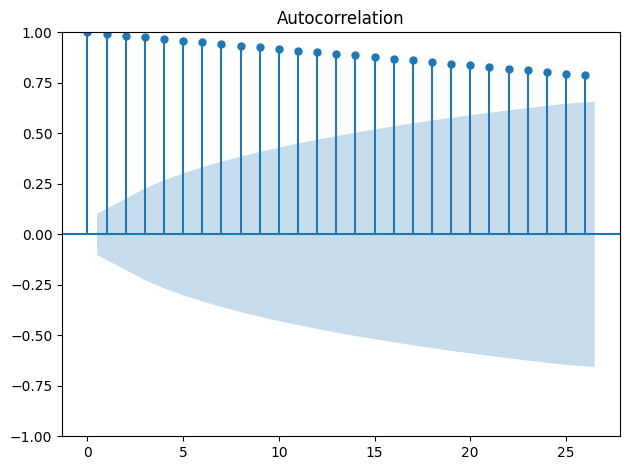

In [820]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(monthly_sales_interpolated['sales'])

plt.tight_layout()

plt.show()

In [821]:
model_totrain = monthly_sales_interpolated['sales'].diff().dropna()
test_stationarity(model_totrain)


Dickey-Fuller test results:


Test Statistic                -6.484758e+00
p-value                        1.269016e-08
#Lags Used                     1.400000e+01
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64

In [822]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit

monthly_sales_interpolated.index = pd.to_datetime(monthly_sales_interpolated.index)
train_size = int(len(monthly_sales_interpolated) * 0.8)  # Tamaño del conjunto de entrenamiento
train, test = monthly_sales_interpolated[:train_size], monthly_sales_interpolated[train_size:]

model = auto_arima(train['sales'], seasonal=True, m=12, d=2, D=0, start_p=0, start_q=1, max_p=1, max_q=3, 
                   trace=True, error_action='ignore', suppress_warnings=True, trend='ct')


Performing stepwise search to minimize aic
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1997.975, Time=0.06 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1814.168, Time=0.32 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1711.902, Time=0.54 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1709.636, Time=0.23 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1707.240, Time=1.28 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=1712.796, Time=1.69 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=inf, Time=2.85 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1999.858, Time=0.08 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=1602.765, Time=1.11 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1601.368, Time=0.51 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1611.230, Time=1.10 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=1606.406, Time=1.20 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1812.604, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[12]     

In [823]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 2, 3)   Log Likelihood                -750.141
Date:                Fri, 07 Jun 2024   AIC                           1512.281
Time:                        18:44:08   BIC                           1534.301
Sample:                    09-03-2022   HQIC                          1521.103
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.005     -0.110      0.913      -0.010       0.009
drift       2.868e-05   2.77e-05      1.037      0.300   -2.56e-05    8.29e-05
ma.L1         -1.8488      0.067    -27.592      0.000      -1.980      -1.717
ma.L2          0.7427      0.132      5.621      0.000       0.484       1.002
ma.L3          0.1166      0.067      1.745      0.081      -0.014       0.247
sigma2        11.6426      1.276      9.126      0.000       9.142      14.143
===================================================================================
Ljung-Box (L1) (Q):                   3.20   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.07   Prob(JB):                         0.53
Heteroskedasticity (H):               1.17   Skew:                             0.05
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

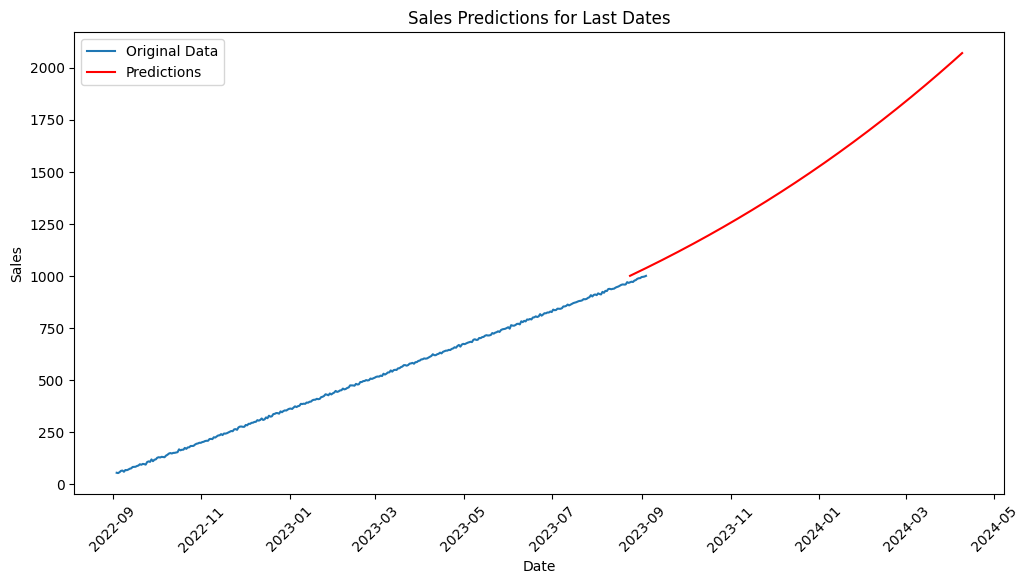

In [824]:
forecast_train= model.predict(n_periods=len(train))
last_dates = forecast_train.tail(230).index

# Seleccionar las predicciones correspondientes a esas fechas
last_predictions = forecast_train.tail(230)

# Graficar las predicciones junto con las fechas originales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_interpolated.index, monthly_sales_interpolated['sales'], label='Original Data')
plt.plot(last_dates, last_predictions, label='Predictions', color='red')
plt.title('Sales Predictions for Last Dates')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

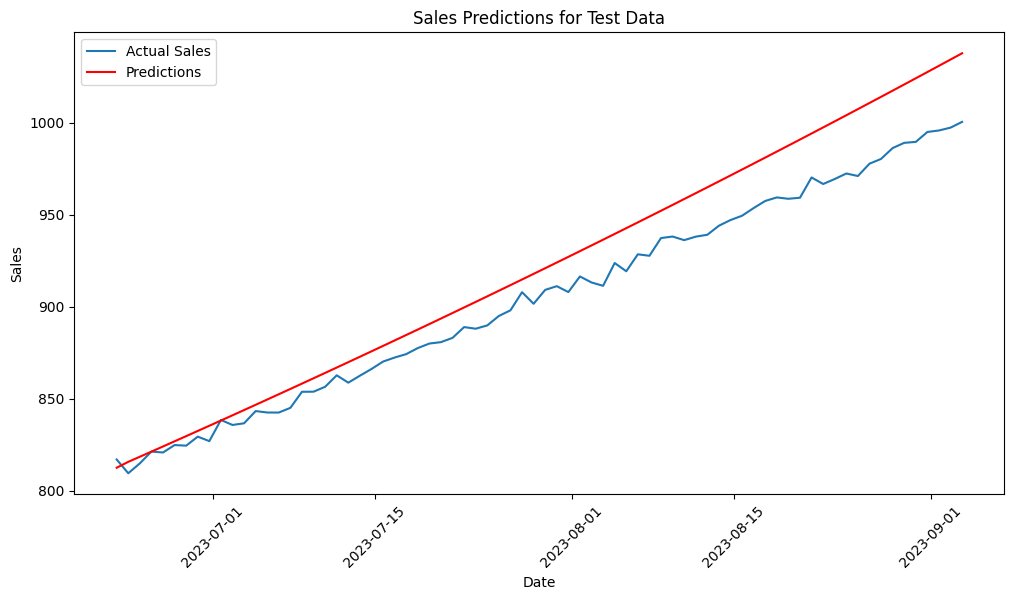

In [825]:
forecast_test = model.predict(n_periods=len(test))
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['sales'], label='Actual Sales')
plt.plot(test.index, forecast_test, label='Predictions', color='red')
plt.title('Sales Predictions for Test Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [828]:

forecast_train_adjusted = forecast_train[-len(train):]
forecast_test_adjusted = forecast_test[-len(test):]

In [830]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape if not np.isnan(mape) else 0

mse_train = mean_squared_error(train['sales'], forecast_train_adjusted)
mae_train = mean_absolute_error(train['sales'], forecast_train_adjusted)
rmse_train = np.sqrt(mse_train)
mape_train = calculate_mape(train['sales'], forecast_train_adjusted)

# Calcular métricas para el conjunto de prueba
mse_test = mean_squared_error(test['sales'], forecast_test_adjusted)
mae_test = mean_absolute_error(test['sales'], forecast_test_adjusted)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(test['sales'], forecast_test_adjusted)

# Imprimir métricas
print("Métricas para el conjunto de entrenamiento:")
print("Error Cuadrático Medio (MSE):", mse_train)
print("Error Absoluto Medio (MAE):", mae_train)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_train)
print("Error Porcentual Absoluto Medio (MAPE):", mape_train)

print("\nMétricas para el conjunto de prueba:")
print("Error Cuadrático Medio (MSE):", mse_test)
print("Error Absoluto Medio (MAE):", mae_test)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse_test)
print("Error Porcentual Absoluto Medio (MAPE):", mape_test)


Métricas para el conjunto de entrenamiento:
Error Cuadrático Medio (MSE): 882479.0677578973
Error Absoluto Medio (MAE): 927.8704958530341
Raíz del Error Cuadrático Medio (RMSE): 939.4035702284175
Error Porcentual Absoluto Medio (MAPE): 0

Métricas para el conjunto de prueba:
Error Cuadrático Medio (MSE): 398.5155430647522
Error Absoluto Medio (MAE): 16.931727705338915
Raíz del Error Cuadrático Medio (RMSE): 19.962854081136598
Error Porcentual Absoluto Medio (MAPE): 1.8111167064079023


EL MODELO AJUSTA DE MANERA ACELTABLE Y LOS PLOTS MUESTRAN QUE LAS PREDICCIONES NO SE ALEJAN TANTO DE LOS VALORES REALES.